# Image Data Generator <font color = red>flow_from_directory()</font>
***
Most of the common problem faced by us is application of ImageDataGenerator in a CNN model. 
Here i have tried to provide some idea about image data generator.
## Import Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset
***
Dataset **PetImage** has been devided into three part training, validation and test set.

Each set has two categories Cat and Dog.
***
1. PetImage
    1. Cat
        1. img0.jpg
        2. img1.jpg
        3. img2.jpg
        4. ........
        5. ........
    2. Dog
        1. img0.jpg
        2. img1.jpg
        3. img2.jpg
        4. ........
        5. ........

## Define the augmentation parameter
***

In [2]:
data_gen_args = dict(rescale=1./255,
                     rotation_range=5,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

In [6]:
image_datagen = ImageDataGenerator(**data_gen_args)

Here are the most used attributes along with the <font color=red>*flow_from_directory()*</font> method.

In [24]:
image_generator = image_datagen.flow_from_directory(
        directory='./PetImages',
        target_size=(128,128),
        classes=['Cat','Dog'],
        color_mode="grayscale",
#        class_mode="categorical", 
        class_mode="binary",
        batch_size=4,
        shuffle=True,
        seed=42)

Found 24990 images belonging to 2 classes.


***
Since our training set consist of 97 images of cat and 100 images of dog, thats why it is showing 197 images from two class. If you have multi class problem instead of two class you can define change $classes=["cat", "dog"] --> classes=["class1", "class2", ....]$ according to class name and $class\_mode="categorial"$
***

## Attribute used with flow_from_directory()
***
 - ***directory***: Must be set to the path, where n classes is present
 
 - ***target_size***: is the size of image returned by generator. Every image returned by generator will be resized to the target size.
 
 - ***classes***: No of class present in your dataset.
 
 - ***color_mode***: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
 
 - ***batch_size***: No. of images to be yielded from the generator per batch.
 
 - ***class_mode***: Set “binary” if you have only two classes to predict, if not set to “categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
 
 - ***shuffle***: Set True if you want to shuffle the order of the image that is being yielded, else set False.
 
 - ***seed***: Random seed for applying random image augmentation and shuffling the order of the image.    


***
## Display an images called by image_generator
***

(4, 128, 128, 1)
(4,)
[1. 0. 1. 1.]


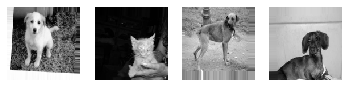

In [25]:
for [x,y] in image_generator:
    print(x.shape)
    print(y.shape)
    print(y)
    for i in range(0,4):
        plt.axis('off')
        plt.subplot(140+1+i)
        plt.imshow(x[i].reshape(128,128), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    break

***
In our case attribute was $color\_mode="grayscale",$ $target\_size=(128,128),$ $classes=["cat","Dog"],$ $class\_mode="Binary",$ $batch\_size=4$

Then we are getting an response from image datagenerator in $x$ and $y$.

Where x has shape $(4,128,128,1)$. Here $4$ represents barch size, $(128,128)$ represents target size and $1$ represent color mode. In our case $color\_mode$ was $grayscale$.

If we changes the color mode from gray scale to $rgb$, then last dimension in $x$ will be changed to $3$.

The shape of $y$ is $(4,)$ and content is $[0,0,1,1]$. Each index of $y$ represents the corresponding class of an image, $0-->Cat$ and $1-->Dog$

Change the $class\_mode=binary$ to $categorial$, then shape of $y$ will be converted to$(4,2)$ and its content $[[1,0],[1,0],[0,1],[0,1]]$. Each column represents a single class and each rows an image.
***
<font color=blue>*the above mentioned cases has been applied below. You can see the result*</font>.

In [26]:
image_generator = image_datagen.flow_from_directory(
        directory='./PetImages',
        target_size=(256,256),
        classes=['Cat','Dog'],
        color_mode="rgb",
        class_mode="categorical", 
        #class_mode="binary",
        batch_size=4,
        shuffle=True,
        seed=42)

Found 24990 images belonging to 2 classes.


(4, 256, 256, 3)
(4, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


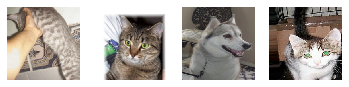

In [28]:
for [x,y] in image_generator:
    print(x.shape)
    print(y.shape)
    print(y)
    for i in range(0,4):
        plt.axis('off')
        plt.subplot(140+1+i)
        plt.imshow(x[i].reshape(256,256,3))
    plt.axis('off')
    plt.show()
    break

***
Change the <font color=red>class_mode</font> to <font color=red>None</font>

It will return only x
***

In [29]:
image_generator = image_datagen.flow_from_directory(
        directory='./PetImages',
        target_size=(256,256),
        classes=['Cat','Dog'],
        color_mode="rgb",
        class_mode=None, 
        #class_mode="binary",
        batch_size=4,
        shuffle=True,
        seed=42)

Found 24990 images belonging to 2 classes.


In [30]:
for [x,y] in image_generator:
    print(x.shape)
    print(y.shape)
    print(y)
    break

ValueError: too many values to unpack (expected 2)

In [31]:
for x in image_generator:
    print(x.shape)
    break

(4, 256, 256, 3)
